Titanic Dataset

In [1]:
#Import libraries that are needed  - pandas, numpy,matplotlib,seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataset = pd.read_csv("C:\\Users\\renug\\Downloads\\titanic_train.csv")

In [3]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
dataset.columns #to view the columns present in the dataset

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
dataset.dtypes  #to understand the datatypes of the features present in the dataset

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

<Axes: xlabel='Survived', ylabel='count'>

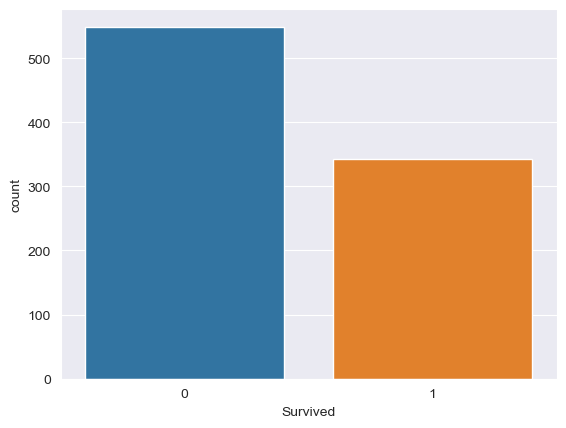

In [6]:
sns.set_style("darkgrid")
sns.countplot(x = "Survived", data = dataset)

#Observation : we are plotting how many survived and not. The below graph shows that majority people not survived the tragedy.

<Axes: xlabel='Survived', ylabel='count'>

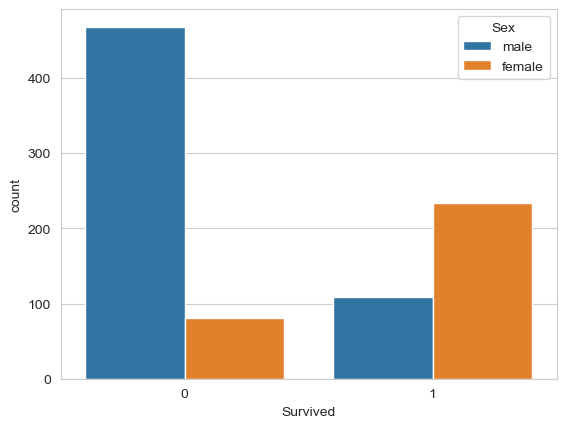

In [7]:
sns.set_style("whitegrid")
sns.countplot(x = "Survived", hue = "Sex", data = dataset)

#observation : the count of females survived is more compared to male. Huge number of male not survived. 

<Axes: xlabel='Survived', ylabel='count'>

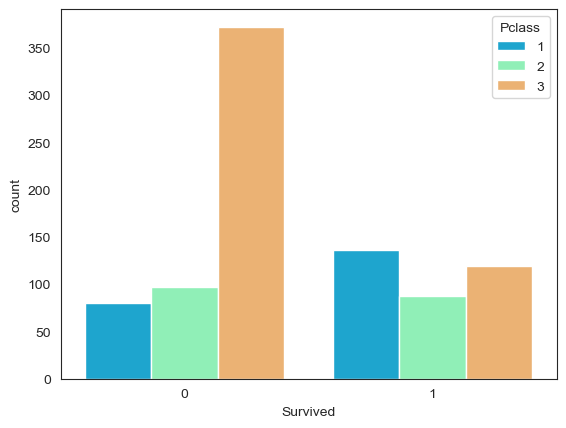

In [8]:
sns.set_style('white')
sns.countplot(x='Survived',hue='Pclass',data=dataset,palette='rainbow')

<Axes: xlabel='SibSp', ylabel='count'>

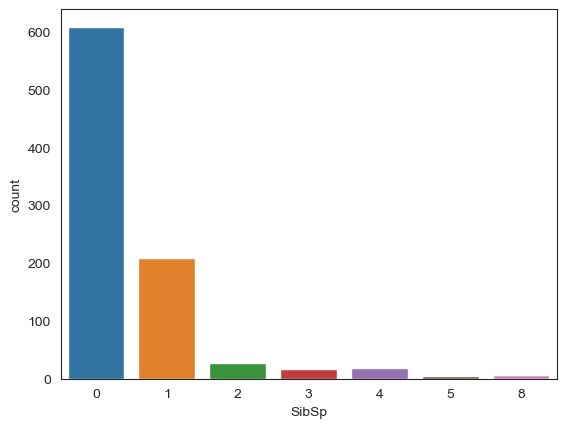

In [9]:
#number of siblings or spuse of a person on board - SibSp
sns.countplot(x='SibSp',data=dataset)
#observation : around 600 people travelled independantly without spouse or siblings

<Axes: >

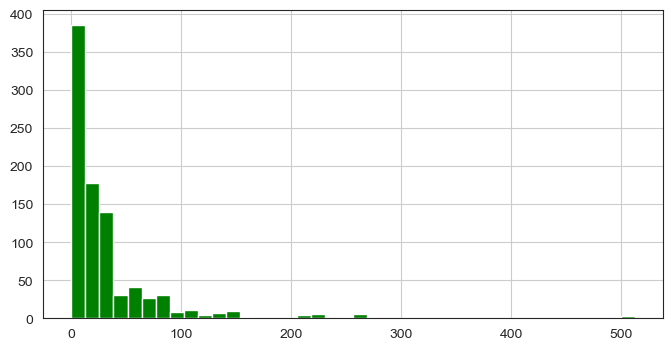

In [10]:
dataset['Fare'].hist(color='green',bins=40,figsize=(8,4))  #average fare of the ticket

In [11]:
#Missing variables in the given dataset

dataset.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
features_with_na = [i for i in dataset.columns if dataset[i].isnull().sum()>1]

In [13]:
features_with_na # this shows the features with null values

['Age', 'Cabin', 'Embarked']

<Axes: >

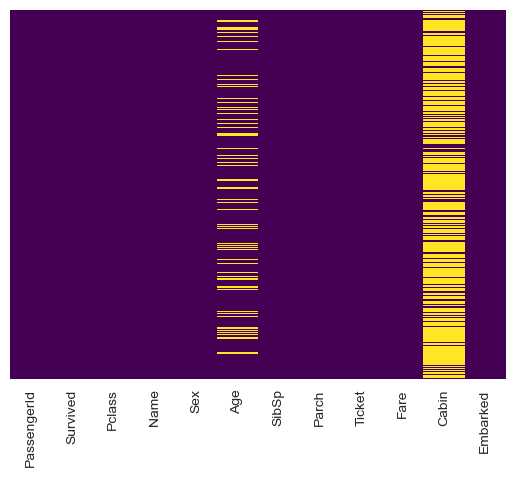

In [14]:
#visualization
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [15]:
dataset["Embarked"].isnull().sum() #  there are 2 null vales which is very less com[pared to other features

2

<Axes: xlabel='Pclass', ylabel='Age'>

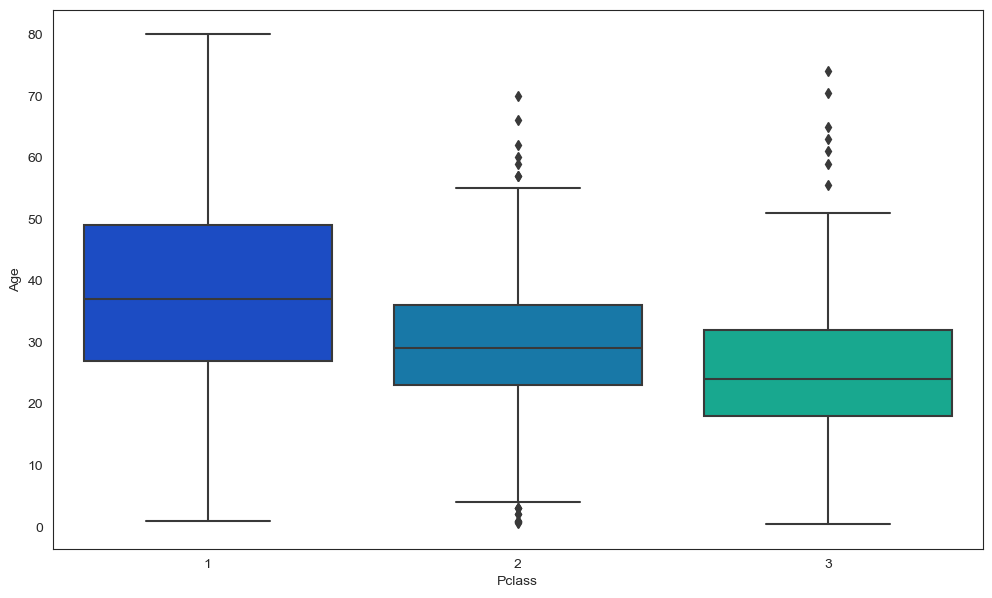

In [16]:
#instead of dropping we have to fill the missing values of age. Best way is to find the average age based on the class

plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=dataset,palette='winter')

wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age

In [17]:
#1 - 37, 2 - 29, 3- 24

In [18]:

def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [19]:
dataset['Age'] = dataset[['Age','Pclass']].apply(impute_age,axis=1)

In [20]:
dataset['Age'].isnull().sum()

0

<Axes: >

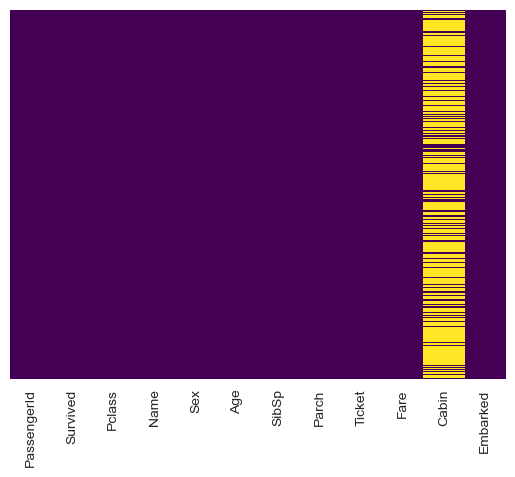

In [21]:
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [22]:
dataset.shape

(891, 12)

In [23]:
dataset["Cabin"].isnull().sum()  #it's better to drop

687

In [24]:
dataset.drop('Cabin',axis=1,inplace=True)

In [25]:
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

<Axes: >

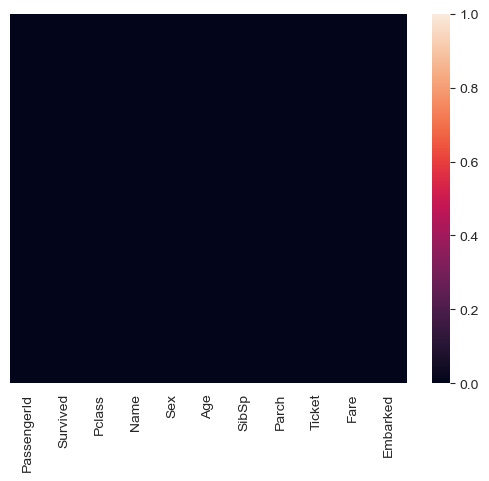

In [26]:
sns.heatmap(dataset.isnull(), yticklabels = False)

In [27]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [28]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [29]:
sex = pd.get_dummies(dataset['Sex'],drop_first=True)
embark = pd.get_dummies(dataset['Embarked'],drop_first=True)

In [30]:
dataset.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [31]:
dataset = pd.concat([dataset,sex,embark],axis=1)

In [32]:
dataset.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
male              bool
Q                 bool
S                 bool
dtype: object